In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Store datasets in dictionaries
train_Amirmehrbod = {'images': train_images, 'labels': train_labels}
test_Amirmehrbod = {'images': test_images, 'labels': test_labels}

# Initial exploration
print("Training dataset size:", train_Amirmehrbod['images'].shape)
print("Testing dataset size:", test_Amirmehrbod['images'].shape)
print("Image resolution:", train_Amirmehrbod['images'][0].shape)
print("Largest pixel value:", np.amax(train_Amirmehrbod['images']))

# Data Preprocessing
train_Amirmehrbod['images'] = train_Amirmehrbod['images'] / 255.0
test_Amirmehrbod['images'] = test_Amirmehrbod['images'] / 255.0

# One-hot encode labels
train_Amirmehrbod['labels'] = tf.keras.utils.to_categorical(train_Amirmehrbod['labels'], 10)
test_Amirmehrbod['labels'] = tf.keras.utils.to_categorical(test_Amirmehrbod['labels'], 10)

print("Shape of train labels:", train_Amirmehrbod['labels'].shape)
print("Shape of test labels:", test_Amirmehrbod['labels'].shape)



Training dataset size: (60000, 28, 28)
Testing dataset size: (10000, 28, 28)
Image resolution: (28, 28)
Largest pixel value: 255
Shape of train labels: (60000, 10)
Shape of test labels: (10000, 10)


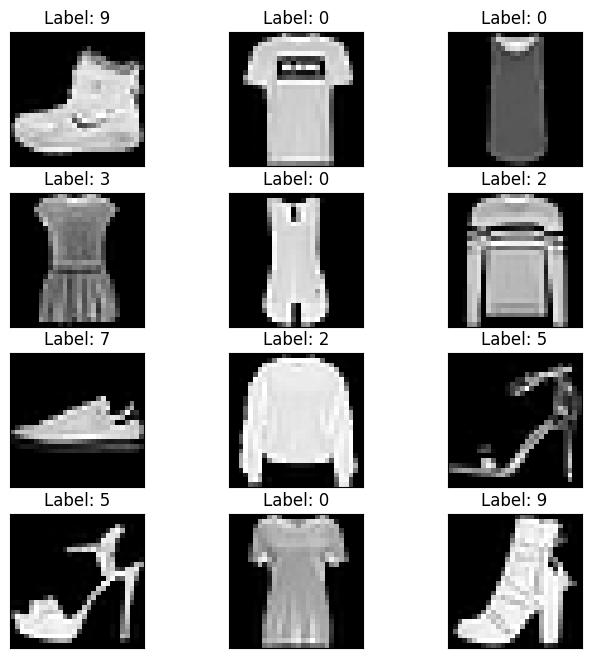

In [2]:
# Visualization function
def plot_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title("Label: " + str(np.argmax(label)))

# Plot first 12 images
plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    plot_image(train_Amirmehrbod['images'][i], train_Amirmehrbod['labels'][i])
plt.show()

In [7]:
# Training Data Preparation
x_train_Amirmehrbod, x_val_Amirmehrbod, y_train_Amirmehrbod, y_val_Amirmehrbod = train_test_split(
    train_Amirmehrbod['images'], train_Amirmehrbod['labels'], test_size=0.2, random_state=54)

# Reshape for CNN input
x_train_Amirmehrbod = x_train_Amirmehrbod.reshape(-1, 28, 28, 1)
x_val_Amirmehrbod = x_val_Amirmehrbod.reshape(-1, 28, 28, 1)
test_Amirmehrbod['images'] = test_Amirmehrbod['images'].reshape(-1, 28, 28, 1)

# Build CNN Model
cnn_model_Amirmehrbod = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_Amirmehrbod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model_Amirmehrbod.summary())

# Train the model
cnn_history_Amirmehrbod = cnn_model_Amirmehrbod.fit(
    x_train_Amirmehrbod, y_train_Amirmehrbod,
    validation_data=(x_val_Amirmehrbod, y_val_Amirmehrbod),
    epochs=8, batch_size=256)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          80,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,678 (354.21 KB)

 Trainable params: 90,678 (354.21 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6586 - loss: 1.0373 - val_accuracy: 0.8210 - val_loss: 0.4950
Epoch 2/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8369 - loss: 0.4522 - val_accuracy: 0.8533 - val_loss: 0.4102
Epoch 3/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8561 - loss: 0.3983 - val_accuracy: 0.8643 - val_loss: 0.3757
Epoch 4/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8696 - loss: 0.3596 - val_accuracy: 0.8746 - val_loss: 0.3525
Epoch 5/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8835 - loss: 0.3268 - val_accuracy: 0.8823 - val_loss: 0.3345
Epoch 6/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8860 - loss: 0.3170 - val_accuracy: 0.8842 - val_loss: 0.3313
Epoch 7/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8908 - loss: 0.3015 - val_accuracy: 0.8919 - val_loss: 0.3071
Epoch 8/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8983 - loss: 0.2814 - val_accuracy: 0.89

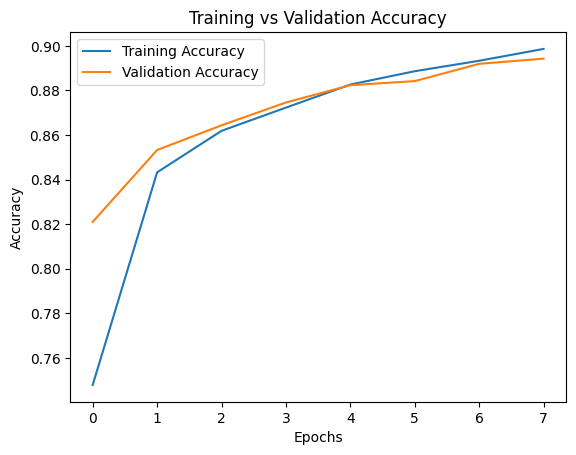

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8910 - loss: 0.3202
Test Accuracy: 0.8892999887466431
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [8]:

# Plot training vs validation accuracy
plt.plot(cnn_history_Amirmehrbod.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_Amirmehrbod.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = cnn_model_Amirmehrbod.evaluate(test_Amirmehrbod['images'], test_Amirmehrbod['labels'])
print("Test Accuracy:", test_acc)

# Make predictions
cnn_predictions_Amirmehrbod = cnn_model_Amirmehrbod.predict(test_Amirmehrbod['images'])


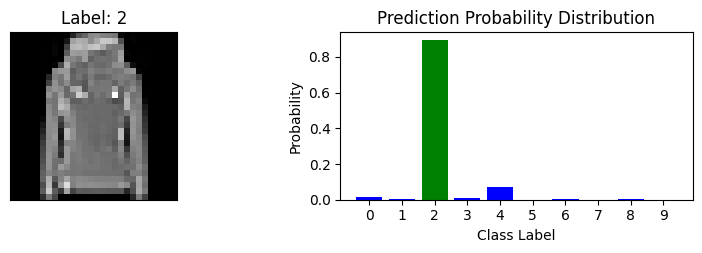

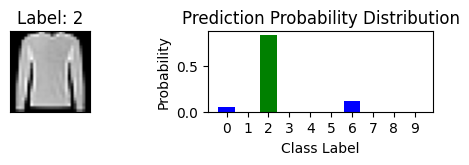

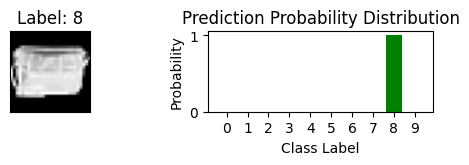

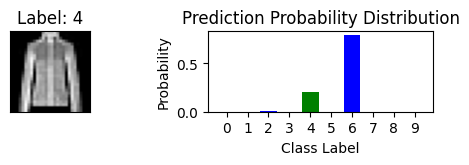

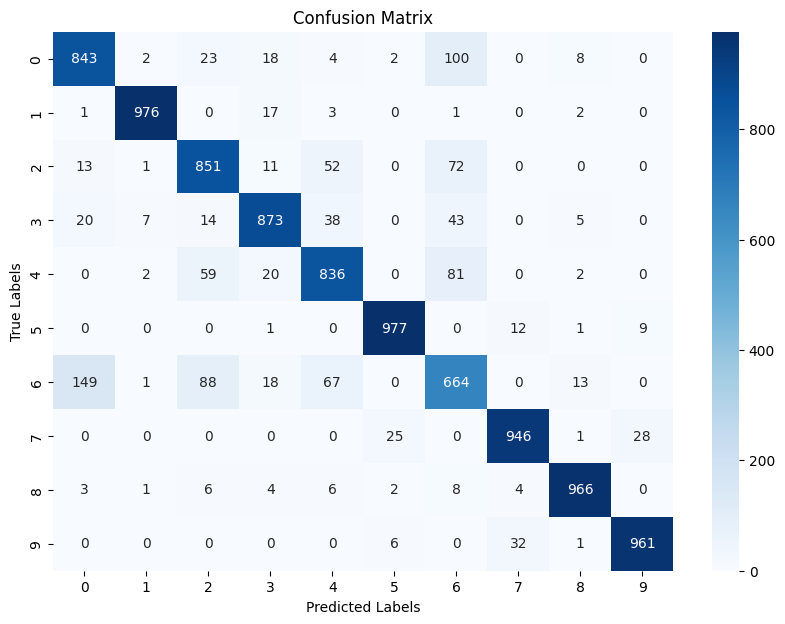

In [11]:
# Function to plot probability distribution
def plot_probability_distribution(true_label, probabilities):
    plt.bar(range(10), probabilities, color='blue')
    plt.bar(true_label, probabilities[true_label], color='green')
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Prediction Probability Distribution')
    plt.xticks(range(10))
    plt.show()

# Plot first 4 images from test dataset starting at index 54
plt.figure(figsize=(10,10))
for i in range(4):
    index = 54 + i
    plt.subplot(4,2,2*i+1)
    plot_image(test_Amirmehrbod['images'][index].reshape(28, 28), test_Amirmehrbod['labels'][index])
    plt.subplot(4,2,2*i+2)
    plot_probability_distribution(np.argmax(test_Amirmehrbod['labels'][index]), cnn_predictions_Amirmehrbod[index])
plt.show()

# Confusion matrix
predicted_labels = np.argmax(cnn_predictions_Amirmehrbod, axis=1)
true_labels = np.argmax(test_Amirmehrbod['labels'], axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5514 - loss: 1.2024 - val_accuracy: 0.7984 - val_loss: 0.5456
Epoch 2/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8116 - loss: 0.5201 - val_accuracy: 0.8165 - val_loss: 0.4880
Epoch 3/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8307 - loss: 0.4575 - val_accuracy: 0.8378 - val_loss: 0.4364
Epoch 4/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8480 - loss: 0.4138 - val_accuracy: 0.8481 - val_loss: 0.4063
Epoch 5/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8580 - loss: 0.3841 - val_accuracy: 0.8536 - val_loss: 0.4003
Epoch 6/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8640 - loss: 0.3698 - val_accuracy: 0.8565 - val_loss: 0.3823
Epoch 7/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8705 - loss: 0.3493 - val_accuracy: 0.8648 - val_loss: 0.3710
Epoch 8/8
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8790 - loss: 0.3329 - val_accuracy: 0.86

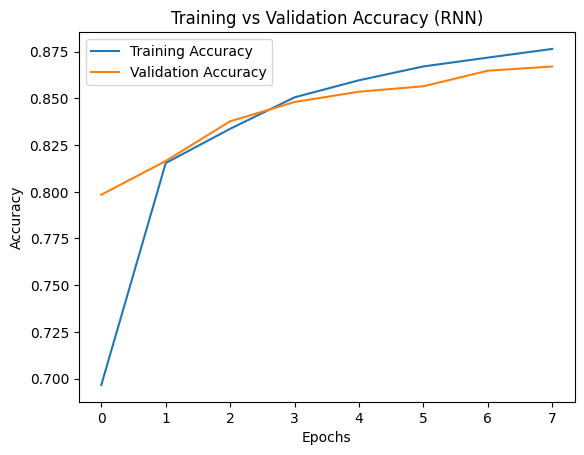

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8595 - loss: 0.3797
Test Accuracy (RNN): 0.8578000068664551
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
# Build RNN Model
x_train_rnn = x_train_Amirmehrbod.reshape(-1, 28, 28)
x_val_rnn = x_val_Amirmehrbod.reshape(-1, 28, 28)
test_rnn = test_Amirmehrbod['images'].reshape(-1, 28, 28)

rnn_model_Amirmehrbod = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

rnn_model_Amirmehrbod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(rnn_model_Amirmehrbod.summary())

# Train the RNN model
rnn_history_Amirmehrbod = rnn_model_Amirmehrbod.fit(
    x_train_rnn, y_train_Amirmehrbod,
    validation_data=(x_val_rnn, y_val_Amirmehrbod),
    epochs=8, batch_size=256)

# Plot training vs validation accuracy for RNN
plt.plot(rnn_history_Amirmehrbod.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_Amirmehrbod.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (RNN)')
plt.legend()
plt.show()

# Evaluate RNN model
test_loss_rnn, test_acc_rnn = rnn_model_Amirmehrbod.evaluate(test_rnn, test_Amirmehrbod['labels'])
print("Test Accuracy (RNN):", test_acc_rnn)

# Make RNN predictions
rnn_predictions_Amirmehrbod = rnn_model_Amirmehrbod.predict(test_rnn)
